# M1.1: Structural Correctness Score

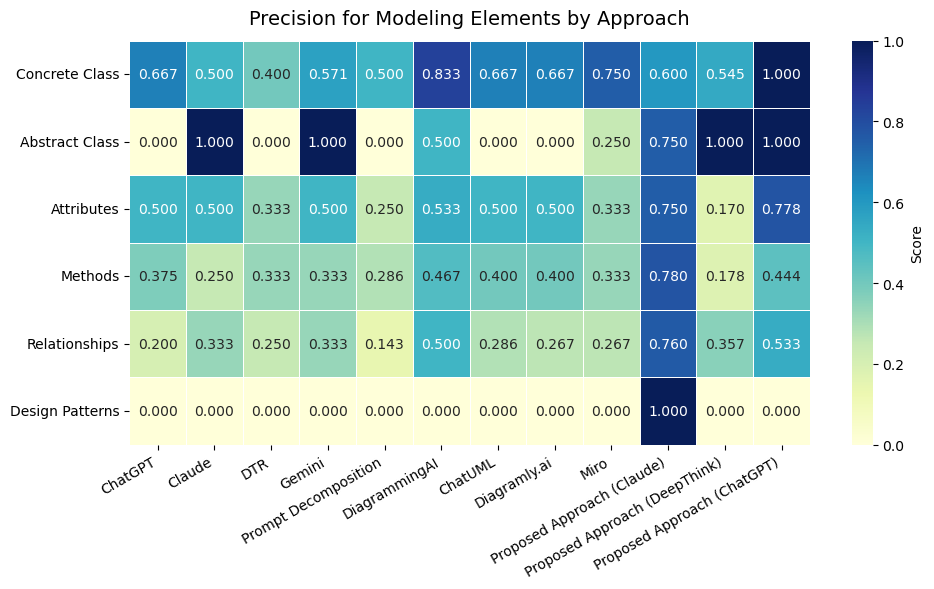

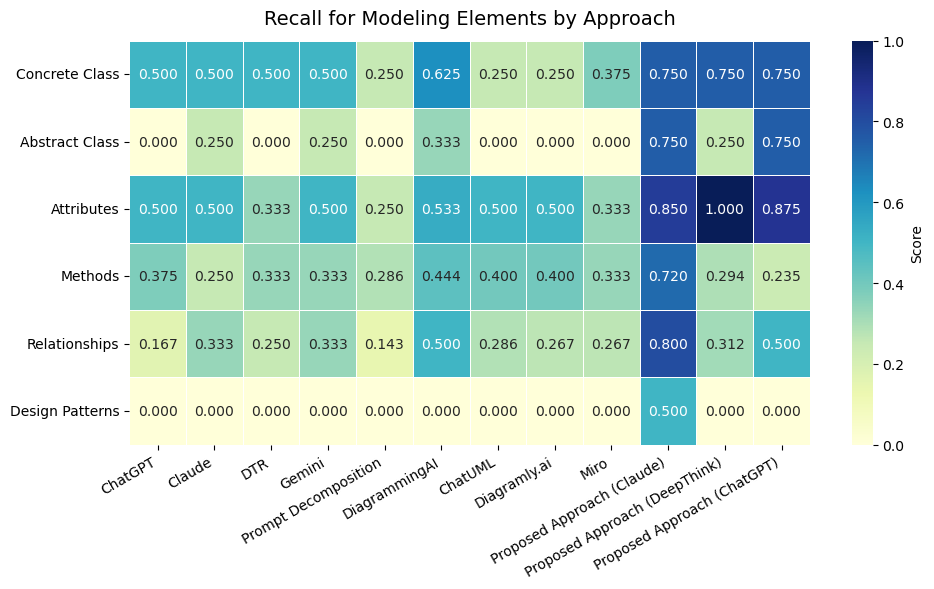

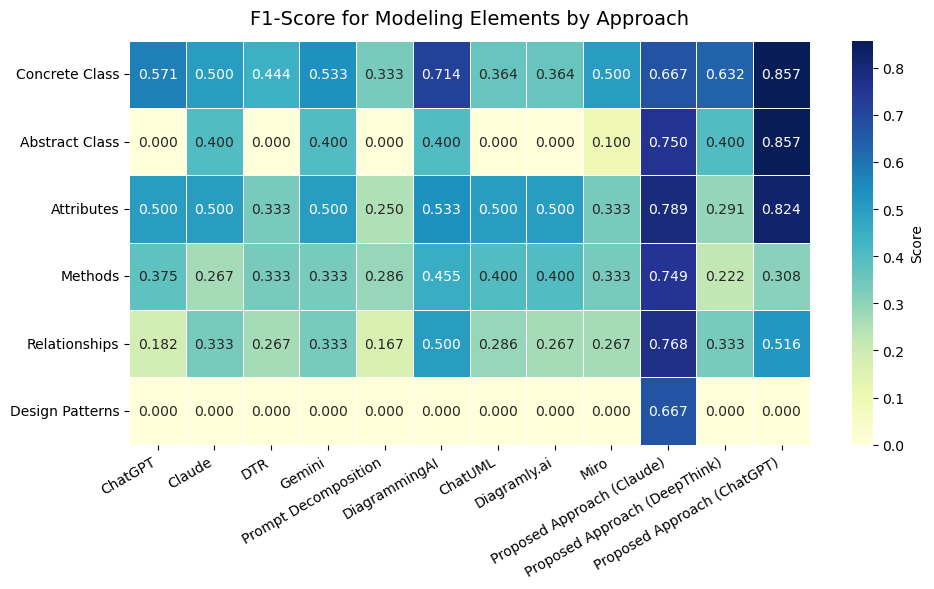

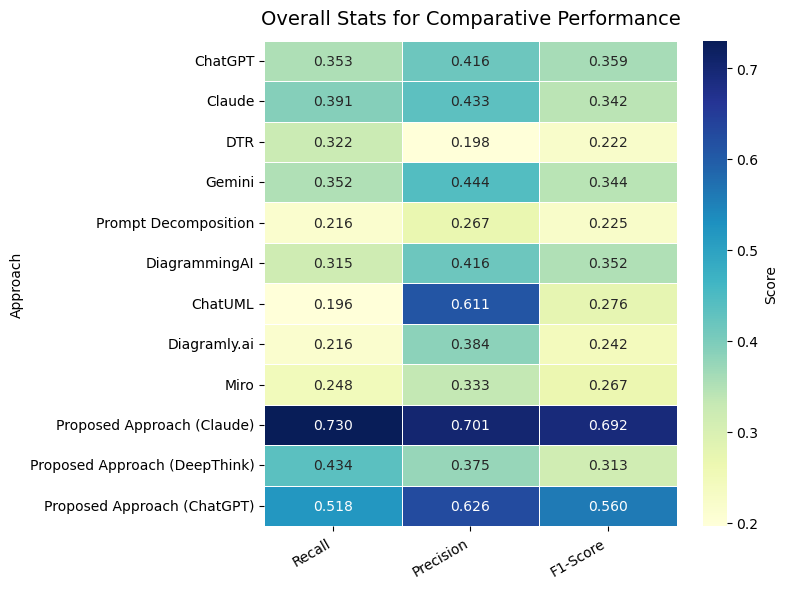

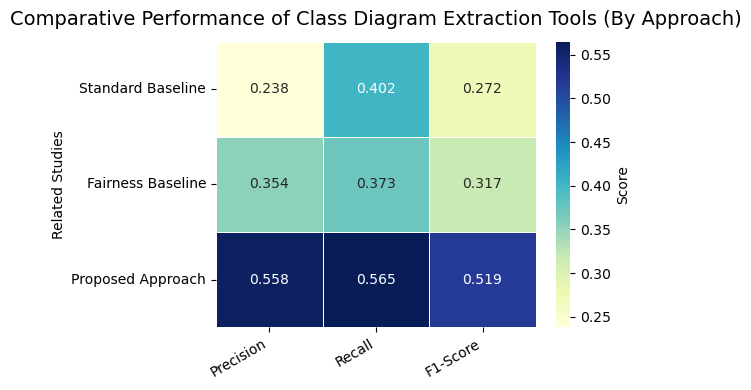

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


approaches = [
    "ChatGPT", "Claude", "DTR", "Gemini",
    "Prompt Decomposition", "DiagrammingAI",
    "ChatUML", "Diagramly.ai", "Miro", "Proposed Approach (Claude)", 
    "Proposed Approach (DeepThink)", "Proposed Approach (ChatGPT)" 
]

# Precision values per modeling element (order: Concrete Class, Abstract Class, Attributes, Methods, Relationships, Design Patterns)
precision_data = {
    "ChatGPT":        [0.6667, 0.0,    0.5,    0.375,  0.2,   0.0],
    "Claude":         [0.5,    1.0,    0.5,    0.25,   0.3333,0.0],
    "DTR":            [0.4,    0.0,    0.3333, 0.3333, 0.25,  0.0],
    "Gemini":         [0.5714, 1.0,    0.5,    0.3333, 0.3333,0.0],
    "Prompt Decomposition":[0.5,0.0,    0.25,   0.2857, 0.1428,0.0],
    "DiagrammingAI":  [0.8333, 0.5,    0.5333, 0.4666, 0.5,   0.0],
    "ChatUML":        [0.6667, 0.0,    0.5,    0.4,    0.2857,0.0],
    "Diagramly.ai":   [0.6667, 0.0,    0.5,    0.4,    0.2666,0.0],
    "Miro":           [0.75,   0.25,   0.3333, 0.3333, 0.2666,0.0],
    "Proposed Approach (Claude)":[0.6,  0.75,  0.75,   0.78,   0.76,  1.0],
    "Proposed Approach (DeepThink)":[0.5455,  1,  0.1702,   0.1785,   0.3571,  0.0],
    "Proposed Approach (ChatGPT)":[1,  1,  0.7778,   0.4444,   0.5333,  0.0]
}

# Recall values per modeling element (same order)
recall_data = {
    "ChatGPT":        [0.5,   0.0,    0.5,    0.375,  0.1666, 0.0],
    "Claude":         [0.5,   0.25,   0.5,    0.25,   0.3333, 0.0],
    "DTR":            [0.5,   0.0,    0.3333, 0.3333, 0.25,   0.0],
    "Gemini":         [0.5,   0.25,   0.5,    0.3333, 0.3333, 0.0],
    "Prompt Decomposition":[0.25,0.0,  0.25,   0.2857, 0.1428, 0.0],
    "DiagrammingAI":  [0.625, 0.333,  0.5333, 0.4444, 0.5,    0.0],
    "ChatUML":        [0.25,  0.0,    0.5,    0.4,    0.2857, 0.0],
    "Diagramly.ai":   [0.25,  0.0,    0.5,    0.4,    0.2666, 0.0],
    "Miro":           [0.375, 0.0,    0.3333, 0.3333, 0.2666, 0.0],
    "Proposed Approach (Claude)":[0.75,0.75,    0.85,   0.72,   0.8,    0.5],
    "Proposed Approach (DeepThink)":[0.75,  0.25,  1,   0.2941,   0.3125,  0.0],
    "Proposed Approach (ChatGPT)":[0.75,  0.75,  0.875,   0.2353,   0.5,  0.0]
}

# F1 values per modeling element (same order)
f1_data = {
    "ChatGPT":        [0.5714, 0.0,    0.5,    0.375,  0.1818, 0.0],
    "Claude":         [0.5,    0.4,    0.5,    0.2666, 0.3333, 0.0],
    "DTR":            [0.444,  0.0,    0.3333, 0.3333, 0.2666, 0.0],
    "Gemini":         [0.5333, 0.4,    0.5,    0.3333, 0.3333, 0.0],
    "Prompt Decomposition":[0.3333,0.0,0.25,  0.2857, 0.1666, 0.0],
    "DiagrammingAI":  [0.7143, 0.4,    0.5333, 0.4545, 0.5,    0.0],
    "ChatUML":        [0.3636, 0.0,    0.5,    0.4,    0.2857, 0.0],
    "Diagramly.ai":   [0.3636, 0.0,    0.5,    0.4,    0.2666, 0.0],
    "Miro":           [0.5,    0.1,    0.3333, 0.3333, 0.2666, 0.0],
    "Proposed Approach (Claude)":[0.6667,0.75, 0.7894, 0.749,  0.768,  0.667],
    "Proposed Approach (DeepThink)":[0.6316,  0.4,  0.2909,   0.222,   0.333,  0.0],
    "Proposed Approach (ChatGPT)":[0.8571,  0.8571,  0.8235,   0.3077,   0.5161,  0.0]
}

# Modeling element labels (rows)
modeling_elements = [
    "Concrete Class",
    "Abstract Class",
    "Attributes",
    "Methods",
    "Relationships",
    "Design Patterns"
]

prec_df = pd.DataFrame(
    {approach: precision_data[approach] for approach in approaches},
    index=modeling_elements
)

rec_df = pd.DataFrame(
    {approach: recall_data[approach] for approach in approaches},
    index=modeling_elements
)

f1_df = pd.DataFrame(
    {approach: f1_data[approach] for approach in approaches},
    index=modeling_elements
)
overall_stats = {
    "Approach": [
        "ChatGPT", "Claude", "DTR", "Gemini",
        "Prompt Decomposition", "DiagrammingAI", "ChatUML",
        "Diagramly.ai", "Miro", "Proposed Approach (Claude)", 
        "Proposed Approach (DeepThink)", "Proposed Approach (ChatGPT)"
    ],
    "Recall": [0.353, 0.3905, 0.322, 0.3517, 0.216, 0.3153, 0.196, 0.216, 0.248, 0.73015, 0.4344, 0.5183],
    "Precision": [0.416, 0.433, 0.198, 0.444, 0.267, 0.4165, 0.611, 0.384, 0.333, 0.701, 0.3752, 0.6259],
    "F1-Score": [0.359, 0.342, 0.222, 0.344, 0.225, 0.352, 0.2758, 0.242, 0.2666, 0.6919, 0.3129, 0.56025]
}
overall_df = pd.DataFrame(overall_stats).set_index("Approach")

comparative_stats = {
    "Related Studies": ["Standard Baseline", "Fairness Baseline", "Proposed Approach"],
    "Precision": [0.23826, 0.3543, 0.5582],
    "Recall": [0.4023, 0.37275, 0.5649],
    "F1-Score": [0.27228, 0.31675, 0.5189]
}
comparative_df = pd.DataFrame(comparative_stats).set_index("Related Studies")

# Plotting helper
def plot_heatmap(df, title, filename=None, figsize=(10,6), fmt=".3f", cmap="YlGnBu"):
    plt.figure(figsize=figsize)
    sns.heatmap(df, annot=True, fmt=fmt, cmap=cmap, linewidths=0.5, cbar_kws={'label': 'Score'})
    plt.title(title, fontsize=14, pad=12)
    plt.ylabel(df.index.name if df.index.name else "")
    plt.xticks(rotation=30, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()
# Generate the five heatmaps
# 1. Precision obtained for modeling elements
plot_heatmap(prec_df, "Precision for Modeling Elements by Approach", filename="precision_modeling_elements.png", fmt=".3f")

# 2. Recall obtained for modeling elements
plot_heatmap(rec_df, "Recall for Modeling Elements by Approach", filename="recall_modeling_elements.png", fmt=".3f")

# 3. F1 obtained for modeling elements
plot_heatmap(f1_df, "F1-Score for Modeling Elements by Approach", filename="f1_modeling_elements.png", fmt=".3f")

# 4. Overall Statistics for Comparative Performance (by Approach-LLM)
plot_heatmap(overall_df, "Overall Stats for Comparative Performance", filename="overall_stats.png", figsize=(8,6), fmt=".3f")

# 5. Comparative Performance of Class Diagram Extraction Tools
plot_heatmap(comparative_df, "Comparative Performance of Class Diagram Extraction Tools (By Approach)", filename="comparative_performance.png", figsize=(6,4), fmt=".3f")


# M1.2: Principle Adherence Score

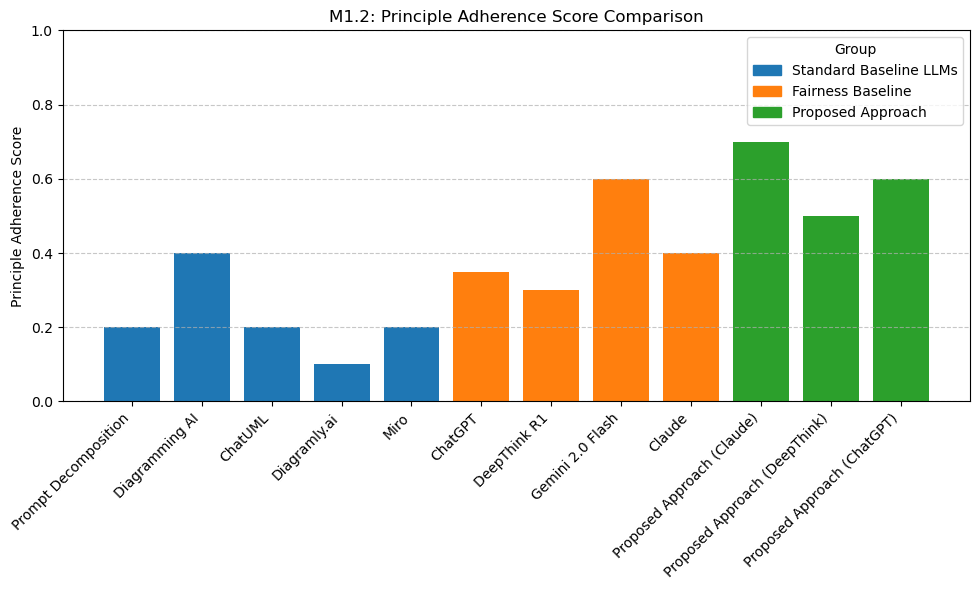

In [3]:
import matplotlib.pyplot as plt

# Data
categories = [
    "Prompt Decomposition", "Diagramming AI", "ChatUML", "Diagramly.ai", "Miro", 
    "ChatGPT", "DeepThink R1", "Gemini 2.0 Flash", "Claude", "Proposed Approach (Claude)",
    "Proposed Approach (DeepThink)", "Proposed Approach (ChatGPT)"
]

scores = [
    0.2, 0.4, 0.2, 0.1, 0.2, 
    0.35, 0.3, 0.6, 0.4, 
    0.7, 0.5, 0.6
]

groups = [
    "Standard Baseline LLMs", "Standard Baseline LLMs", "Standard Baseline LLMs", "Standard Baseline LLMs", "Standard Baseline LLMs",
    "Fairness Baseline", "Fairness Baseline", "Fairness Baseline", "Fairness Baseline", 
    "Proposed Approach", "Proposed Approach", "Proposed Approach"
]

colors = {
    "Standard Baseline LLMs": "#1f77b4",
    "Fairness Baseline": "#ff7f0e",
    "Proposed Approach": "#2ca02c"
}

# Plot
plt.figure(figsize=(10,6))
for i, (cat, score, grp) in enumerate(zip(categories, scores, groups)):
    plt.bar(i, score, color=colors[grp])

# X-axis labels
plt.xticks(range(len(categories)), categories, rotation=45, ha='right')
plt.ylabel("Principle Adherence Score")
plt.ylim(0, 1)
plt.title("M1.2: Principle Adherence Score Comparison")

# Legend
handles = [plt.Rectangle((0,0),1,1, color=colors[g]) for g in colors]
plt.legend(handles, colors.keys(), title="Group")

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# M1.3: Expert Usefulness Rating

In [4]:
from sklearn.metrics import cohen_kappa_score
import numpy as np
from statsmodels.stats.inter_rater import fleiss_kappa

# Example categorical data for three experts
expert1 = ["1", "1", "3", "2", "1", "2", "3", "3", "3", "4", "3", "3"]
expert2 = ["2", "2", "2", "2", "1", "3", "3", "2", "3", "4", "3", "3"] 
expert3 = ["1", "2", "2", "2", "2", "2", "2", "3", "2", "3", "3", "3"] 

# Pairwise Cohen's Kappa
kappa12 = cohen_kappa_score(expert1, expert2)
kappa23 = cohen_kappa_score(expert2, expert3)
kappa31 = cohen_kappa_score(expert3, expert1)
print("Cohen's Kappa12:", kappa12)
print("Cohen's Kappa23:", kappa23)
print("Cohen's Kappa31:", kappa31)

# Convert ratings to counts for Fleiss' Kappa
all_ratings = [expert1, expert2, expert3]
num_items = len(expert1)
num_categories = 5  # Likert scale 1–5

ratings_matrix = np.zeros((num_items, num_categories), dtype=int)
for i in range(num_items):
    for rater in all_ratings:
        category = int(rater[i]) - 1  # zero-indexed
        ratings_matrix[i][category] += 1

fleiss = fleiss_kappa(ratings_matrix)
print("Fleiss' Kappa:", fleiss)

Cohen's Kappa12: 0.3999999999999999
Cohen's Kappa23: 0.045454545454545414
Cohen's Kappa31: 0.30097087378640786
Fleiss' Kappa: 0.23404255319148934


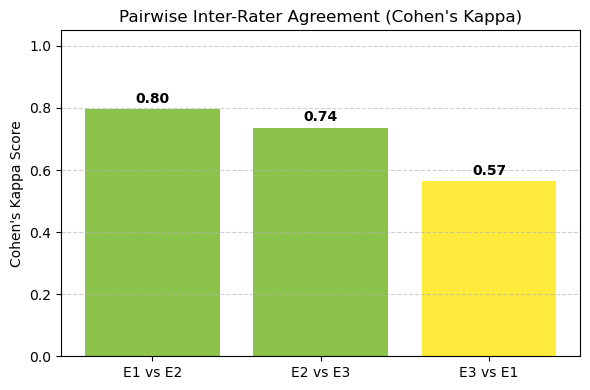

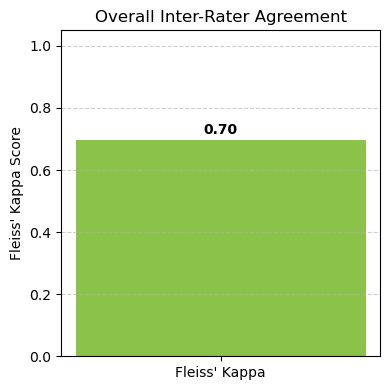

In [5]:
import matplotlib.pyplot as plt

# Agreement scores
cohen_scores = {
    "E1 vs E2": 0.7959,
    "E2 vs E3": 0.7368,
    "E3 vs E1": 0.5652
}
fleiss_score = 0.6954

# Function to get color based on interpretation scale
def kappa_color(kappa):
    if kappa < 0:
        return "#f44336"  # red
    elif kappa <= 0.20:
        return "#ff9800"  # orange
    elif kappa <= 0.40:
        return "#ffc107"  # amber
    elif kappa <= 0.60:
        return "#ffeb3b"  # yellow
    elif kappa <= 0.80:
        return "#8bc34a"  # light green
    else:
        return "#388e3c"  # dark green

# 1. Bar chart for Cohen's Kappa
plt.figure(figsize=(6, 4))
colors = [kappa_color(v) for v in cohen_scores.values()]
plt.bar(cohen_scores.keys(), cohen_scores.values(), color=colors)
plt.ylim(0, 1.05)
plt.ylabel("Cohen's Kappa Score")
plt.title("Pairwise Inter-Rater Agreement (Cohen's Kappa)")

# Add labels and interpretation text
for i, (label, v) in enumerate(cohen_scores.items()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 2. Fleiss' Kappa visualization
plt.figure(figsize=(4, 4))
fleiss_color = kappa_color(fleiss_score)
plt.bar(["Fleiss' Kappa"], [fleiss_score], color=fleiss_color)
plt.ylim(0, 1.05)
plt.ylabel("Fleiss' Kappa Score")
plt.title("Overall Inter-Rater Agreement")
plt.text(0, fleiss_score + 0.02, f"{fleiss_score:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


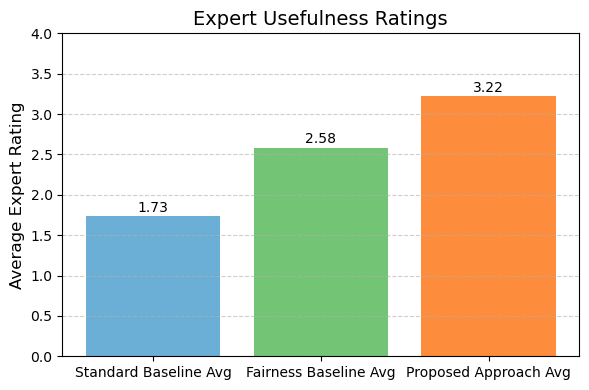

In [6]:
import matplotlib.pyplot as plt

# Data
categories = ['Standard Baseline Avg', 'Fairness Baseline Avg', 'Proposed Approach Avg']
scores = [1.733, 2.583, 3.222]

# Create bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(categories, scores, color=['#6baed6', '#74c476', '#fd8d3c'])

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', 
             ha='center', va='bottom', fontsize=10)

# Chart labels and style
plt.ylim(0, 4)
plt.ylabel('Average Expert Rating', fontsize=12)
plt.title('Expert Usefulness Ratings', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# M2.1: Principle Adherence Improvement

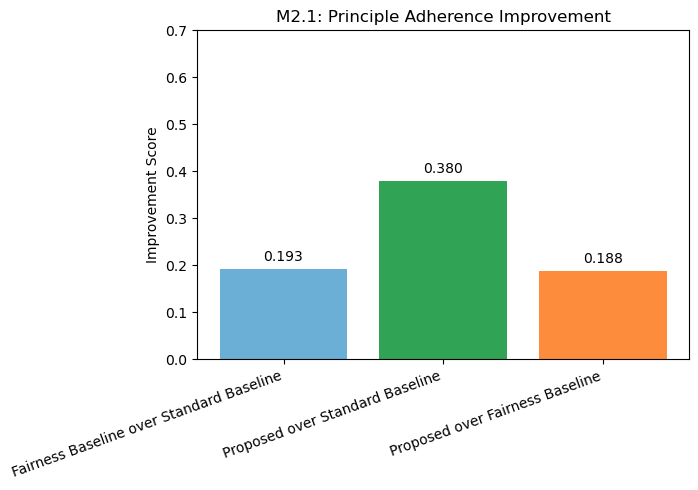

In [7]:
import matplotlib.pyplot as plt

# Data
categories = [
    "Fairness Baseline over Standard Baseline",
    "Proposed over Standard Baseline",
    "Proposed over Fairness Baseline"
]
scores = [0.1925, 0.38, 0.1875]

# Plot
plt.figure(figsize=(7, 5))
bars = plt.bar(categories, scores, color=["#6baed6", "#31a354", "#fd8d3c"])

# Add values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{height:.3f}",
        ha="center",
        va="bottom",
        fontsize=10
    )

# Labels and title
plt.ylabel("Improvement Score")
plt.title("M2.1: Principle Adherence Improvement")
plt.ylim(0, 0.7)  # Leave room for labels above bars
plt.xticks(rotation=20, ha="right")

plt.tight_layout()
plt.show()


# M2.2: Structural Quality Subscores

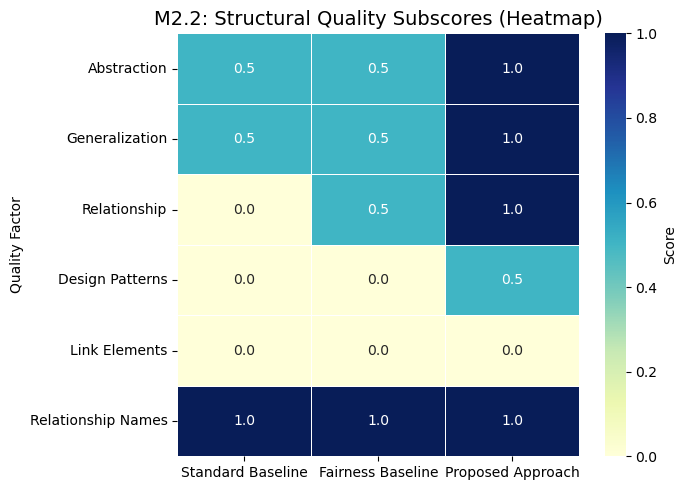

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    "Quality Factor": [
         "Abstraction", "Generalization", "Relationship", "Design Patterns",
        "Link Elements", "Relationship Names"
    ],
    "Standard Baseline" : [0.5, 0.5, 0, 0, 0, 1],
    "Fairness Baseline" : [0.5, 0.5, 0.5, 0, 0, 1],
    "Proposed Approach" : [1, 1, 1, 0.5, 0, 1]

}



# Create DataFrame
df = pd.DataFrame(data)
df = df.set_index("Quality Factor")

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(df, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Score'}, fmt=".1f", linewidths=0.5)

plt.title("M2.2: Structural Quality Subscores (Heatmap)", fontsize=14)
plt.yticks(rotation=0)  # Keep factor names horizontal
plt.tight_layout()
plt.show()


# M2.3: Post-Correction Effort

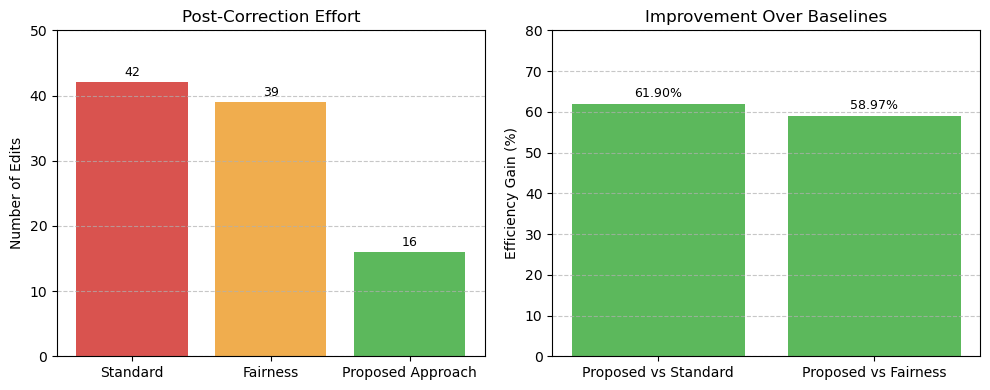

In [9]:
import matplotlib.pyplot as plt


# Data
models = ['Standard', 'Fairness', 'Proposed Approach']
edits = [42, 39, 16]


# Efficiency gains
gains_labels = ['Proposed vs Standard', 'Proposed vs Fairness']
gains = [
    (42 - 16) / 42 * 100,  # vs Baseline
    (39 - 16) / 39 * 100,   # vs Fairness
    
]

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# --- Left chart: Number of edits ---
bars1 = axes[0].bar(models, edits, color=['#d9534f', '#f0ad4e', '#5cb85c'])
axes[0].set_ylabel('Number of Edits')
axes[0].set_title('Post-Correction Effort')
axes[0].set_ylim(0, 50)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Annotate edits
for bar in bars1:
    axes[0].text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 0.5,
                 f'{bar.get_height():.0f}',
                 ha='center', va='bottom', fontsize=9)

# --- Right chart: Efficiency gains ---
bars2 = axes[1].bar(gains_labels, gains, color=['#5cb85c', '#5cb85c'])
axes[1].set_ylabel('Efficiency Gain (%)')
axes[1].set_title('Improvement Over Baselines')
axes[1].set_ylim(0, 80)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Annotate gains
for bar in bars2:
    axes[1].text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 1,
                 f'{bar.get_height():.2f}%',
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
